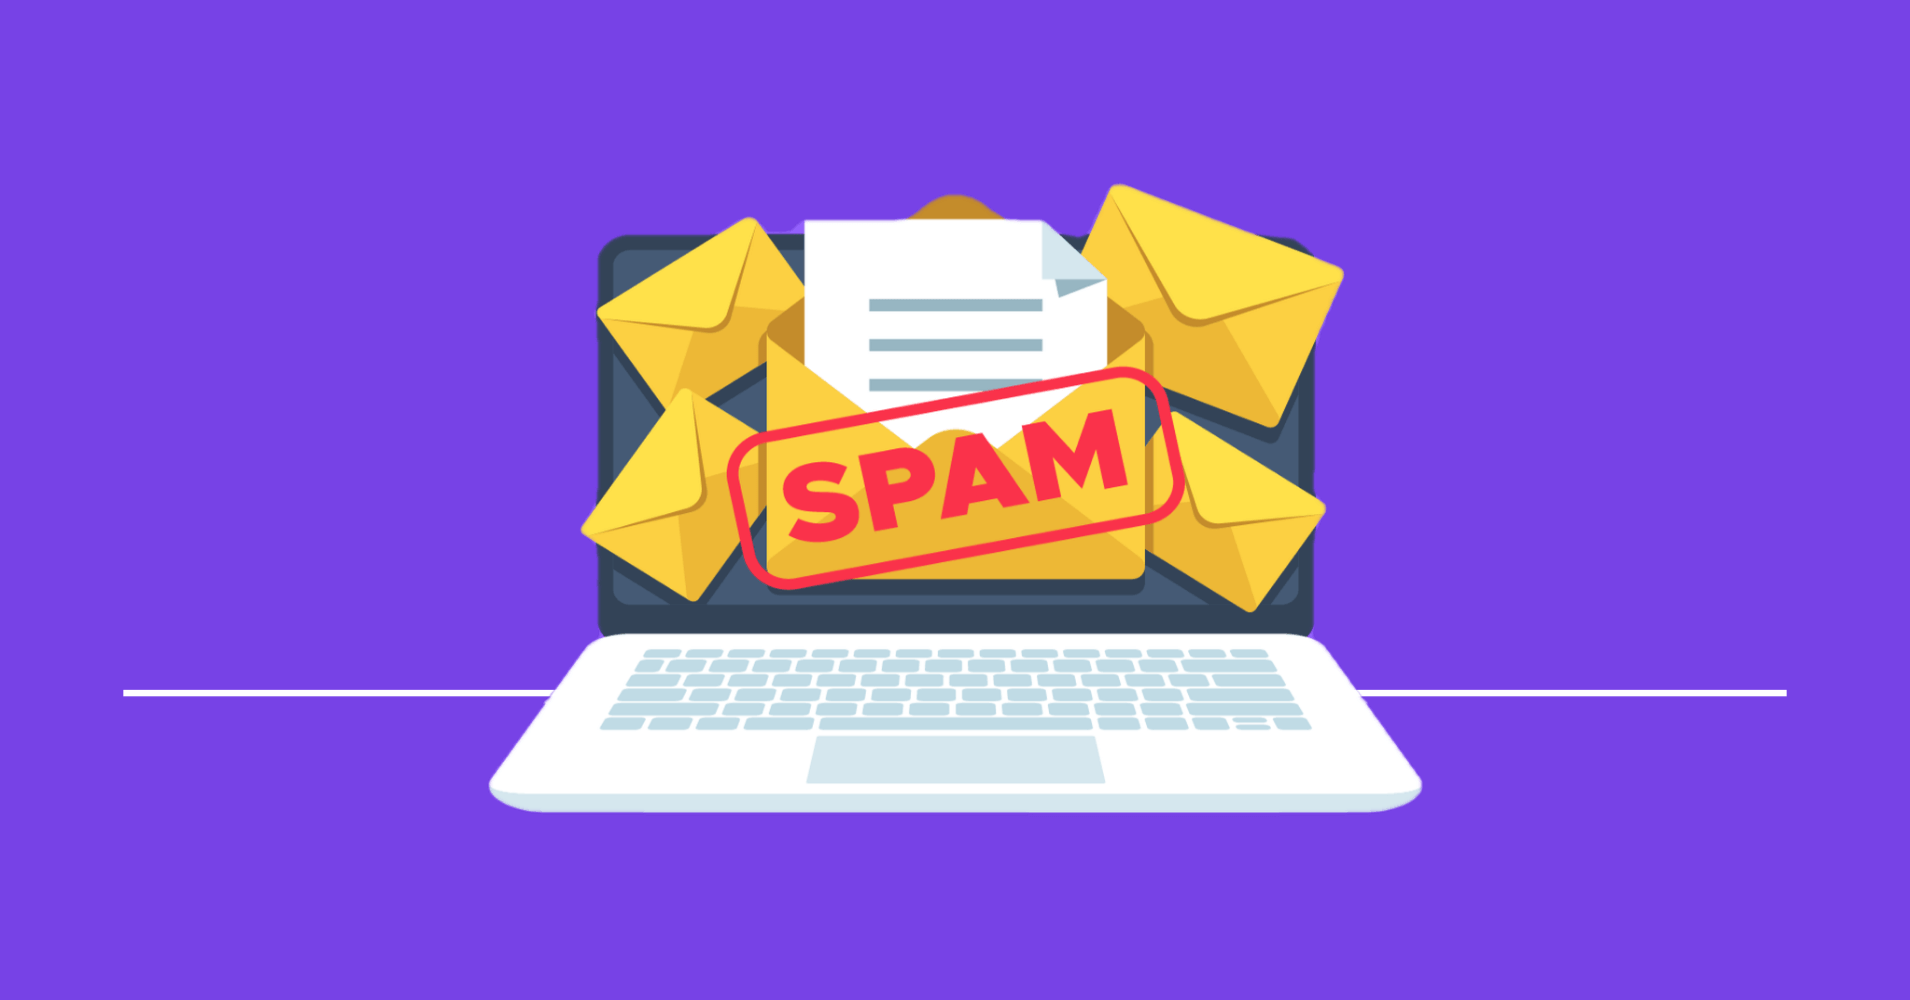

#**INTRODUCTION**
Email spam, also known as junk email, refers to unsolicited email messages, usually sent in bulk to a large list of recipients. Spam can be sent by real humans, but more often, it is sent by a botnet, which is a network of computers (bots or spambots) infected with malware and controlled by a single attacking party (bot herder). Apart from email, spam can also be distributed via text messages or social media.

Most people find spam annoying but consider it an inevitable side effect of using email communication. While spam is annoying -- it can choke email inboxes if not properly filtered and regularly deleted -- it can also be a threat.

In [25]:
#IMPORTING BASIC LIBRARIES 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer # it can convert text into numerical/feature data for understanding of machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



In [2]:
import chardet

with open('spam.csv', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']

Mail = pd.read_csv('spam.csv', encoding=encoding)

#DATA COLLECTION AND PRE_PROCESSING

In [3]:
Mail.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
Mail.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True) # here i drop some column that is NaN values including

In [5]:
Mail.head()


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
Mail = Mail.rename(columns={'v1': 'Category','v2':'Message'}) # here we rename the columns

In [7]:
Mail.shape # It Show the Number of Row and Column..

(5572, 2)

In [8]:
Mail.info() #Information about dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
Mail.isnull().sum() # It checking the Missing or Null Value in this datset 

Category    0
Message     0
dtype: int64

#Label Encoding

In [11]:
# we can do labeling here
# spam male:0
# ham mail:1
spam={'spam':0,'ham':1}
Mail['Category']=Mail['Category'].map(spam)

In [12]:
Mail['Category'].value_counts() # Here check the value of both

1    4825
0     747
Name: Category, dtype: int64

In [13]:
# Now we can separate the data in text and label in X and Y

X=Mail['Message']

y=Mail['Category']

In [14]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [15]:
print(y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: int64


#Now spliting the data into Training data And Testing data..

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [20]:
# now  we can ensure and check how many rows in our dataset
print('The columns of dataset',X.shape)
print("The columns of test dataset",X_test.shape)
print("The Columns of train dataset",X_train.shape)

The columns of dataset (5572,)
The columns of test dataset (1115,)
The Columns of train dataset (4457,)


#Feature Extraction

In [ ]:
# now we can convert text into numerical data  because logistic regresssion can not understand the text or categorical data in this dataset

In [27]:
Feature_extraction=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)
X_train_feature=Feature_extraction.fit_transform(X_train)
X_test_feature=Feature_extraction.transform(X_test)



In [26]:
print(type(y_train))

<class 'pandas.core.series.Series'>


In [28]:
# convert Y train and Y test type as int
y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [29]:
print(X_train_feature)

  (0, 547)	0.19152841010524888
  (0, 4294)	0.28644338819823545
  (0, 4441)	0.3004300201964308
  (0, 323)	0.20701507316885265
  (0, 1582)	0.3004300201964308
  (0, 2060)	0.28644338819823545
  (0, 17)	0.3004300201964308
  (0, 1170)	0.235861682013409
  (0, 255)	0.3004300201964308
  (0, 299)	0.3004300201964308
  (0, 7385)	0.17495047100609937
  (0, 1950)	0.18804107135562415
  (0, 1121)	0.22100170516704798
  (0, 419)	0.21064951354406
  (0, 5654)	0.3004300201964308
  (1, 4677)	0.39845583282426406
  (1, 3193)	0.2591671916327502
  (1, 4124)	0.3296434324793044
  (1, 7208)	0.19855109683473132
  (1, 4221)	0.23143613226832413
  (1, 2368)	0.4417441422204556
  (1, 4123)	0.6142291225048643
  (2, 2542)	0.725064435052481
  (2, 5067)	0.46348688962377765
  (2, 1877)	0.3715292831116183
  :	:
  (4454, 2748)	0.2300309211785976
  (4454, 776)	0.19922677591108967
  (4454, 3414)	0.22227798914184893
  (4454, 3983)	0.16274117830861917
  (4454, 4482)	0.1632428077377904
  (4454, 7269)	0.1907605281605737
  (4454, 5987

#Training the model

#Logistic Regression

In [30]:
model=LogisticRegression()


In [31]:
# Now we do trained the logistic regression model with training data
model.fit(X_train_feature,y_train)

LogisticRegression()

#Now Evaluating the trained model

In [32]:
# prediction on training data
prediction=model.predict(X_train_feature)
Accuracy=accuracy_score(y_train,prediction)

In [34]:
print("Accuracy of training data is",Accuracy)

Accuracy of training data is 0.9685887368184878


In [35]:
# prediction on test data
prediction_test=model.predict(X_test_feature)
Accuracy_test=accuracy_score(y_test,prediction_test)

In [36]:
print("Accuracy of test dataset",Accuracy_test)

Accuracy of test dataset 0.9659192825112107


#Built a predictive system

In [41]:
Input_mail=["URGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18"]
#convert categorical/text into numbers
Input_Feature=Feature_extraction.transform(Input_mail)

# prediction
prediction=model.predict(Input_Feature)
print(prediction)

#now we make a program to make its spam or ham give value 1,0
if (prediction[0]==1):
  print("ham mail")
else:
  print("spam mail")

[0]
spam mail
